In [1]:
%matplotlib inline
import time 

from qutip import mesolve, steadystate
#from importlib import reload



import numpy as np
import optical as EM
import phonons as RC
import leads as FL
from utils import *
from photocell_setup import *
import matplotlib.pyplot as plt
from style import *



utils imported


In [2]:
plt.style.use('ggplot')
plt.rcParams["axes.grid"] = True
plt.rc('grid', linestyle="--", color='grey')
plt.rcParams['grid.linestyle'] = "--"
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.3
plt.rcParams['lines.linewidth'] = 2.3
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.size'] = 18
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{physics} ')
colours = ['#1E90FF', '#3CB371', '#FFA500', '#FF0000']

Phonon occupation: 0.17. Phonon thermal energy is 208.50. Phonon SD peak is 401.30. V=0.0. N=3.
Phonon occupation: 0.01. Phonon thermal energy is 208.50. Phonon SD peak is 967.96. V=0.0. N=3.


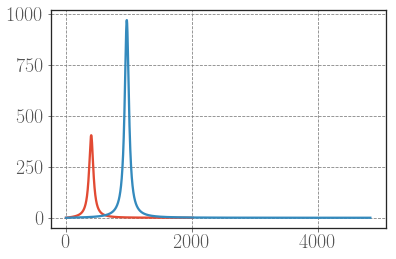

In [27]:


def plot_underdamped(PARAMS):
    omegas = np.linspace(0, 5*PARAMS['Omega_ph'], int(5*PARAMS['Omega_ph']))
    Jvals = [J_underdamped(w, PARAMS['Gamma_ph'], PARAMS['Omega_ph'], alpha=PARAMS['alpha_ph']) for w in omegas]
    #plt.figure()
    plt.plot(omegas, Jvals)
    
PARAMS = PARAMS_setup(valence_energy=300e-3, binding_energy=0., radiative_lifetime=1, alpha_ph=10e-3, mu=700e-3,
                      bias_voltage=0, N=3, silent=False, T_C=300., Gamma_ph=10e-3, Omega_ph=50e-3)
plot_underdamped(PARAMS)
PARAMS = PARAMS_setup(valence_energy=300e-3, binding_energy=0., radiative_lifetime=1, alpha_ph=10e-3, mu=700e-3,
                      bias_voltage=0, N=3, silent=False, T_C=300., Gamma_ph=10e-3, Omega_ph=120e-3)
plot_underdamped(PARAMS)
#data_dict_ = populations_and_current_vs_voltage(PARAMS)
#plt.plot(data_dict_['bias_voltages'], np.array(data_dict_['current']), label=r'$\alpha=0meV$')

# Designing an experiment to understand non-additivity

The dependence of populations on phonon coupling


## Non-additivity of optical dissipator

different effective transition rates sampling spectral density differently competes with different thermal occupations.


## Non-additivity of lead dissipators

<img src="PLOTS/FermionModel4LS.png" alt="Drawing" style="width: 500px;"/>

- different effective transition frequencies sampling spectral density differently. 
    - Since the maximum coupling is always at the non-additive conduction and (negative) valence frequencies, increasing phonon coupling tends to push a transition out of the optimal window
    - For U=0, the charge-separation transitions will move out of the optimal window at the same time as the free-carrier transition rates
    - For $U\neq 0$, the CS step will be initially less well coupled to the leads. 

- different effective transition frequencies have different thermal occupations:


- At zero phonon-coupling, 

In [15]:
np.linspace(0.0, 0.1, 2)

array([0. , 0.1])

C-V data calculated in 2.6 seconds
[0.0001255979943027979, 0.0001255979943027979]
C-V data calculated in 3.1 seconds
[0.00012246427256597226, 0.00012246427256597226]
C-V data calculated in 3.0 seconds
[0.00011941752129081287, 0.00011941752129081287]
C-V data calculated in 3.0 seconds
[0.00011646330570016486, 0.00011646330570016486]
C-V data calculated in 3.0 seconds
[0.00011360868173323502, 0.00011360868173323502]
C-V data calculated in 4.6 seconds
[0.00011076760857552646, 0.00011076760857552646]
C-V data calculated in 4.7 seconds
[0.00010805565352838102, 0.00010805565352838102]
C-V data calculated in 4.6 seconds
[0.00010543112330896626, 0.00010543112330896626]
C-V data calculated in 4.6 seconds
[0.00010289574474140846, 0.00010289574474140846]
C-V data calculated in 4.6 seconds
[0.00010045115010930628, 0.00010045115010930628]
C-V data calculated in 6.7 seconds
[9.792757973233409e-05, 9.792757973233409e-05]
C-V data calculated in 6.9 seconds
[9.559520576025039e-05, 9.559520576025039e-05

C-V data calculated in 17.6 seconds
[1.1772529020097154e-06, 1.1772529020097154e-06]
C-V data calculated in 2.4 seconds
[8.527926926764131e-07, 8.527926926764131e-07]
C-V data calculated in 3.1 seconds
[8.445325515983946e-07, 8.445325515983946e-07]
C-V data calculated in 3.2 seconds
[8.364297973748632e-07, 8.364297973748632e-07]
C-V data calculated in 3.5 seconds
[8.284791785854659e-07, 8.284791785854659e-07]
C-V data calculated in 3.9 seconds
[8.206762529155347e-07, 8.206762529155347e-07]
C-V data calculated in 5.0 seconds
[8.130235648523325e-07, 8.130235648523325e-07]
C-V data calculated in 5.0 seconds
[8.055103397484097e-07, 8.055103397484097e-07]
C-V data calculated in 4.7 seconds
[7.981343550401956e-07, 7.981343550401956e-07]
C-V data calculated in 4.7 seconds
[7.908926982192418e-07, 7.908926982192418e-07]
C-V data calculated in 5.0 seconds
[7.837817525599913e-07, 7.837817525599913e-07]
C-V data calculated in 7.1 seconds
[7.76804697549991e-07, 7.76804697549991e-07]
C-V data calcul

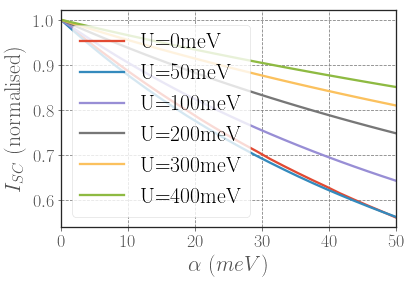

In [4]:
def short_current_from_dict(dd):
    # assumes that V=0 at element 0
    return dd['current'][0]

def calculate_current_slope(binding_energies, alpha_values, lead_SD='Lorentzian'):
    data = []
    for BE in binding_energies: #[0., 0.025, 0.05, 0.075, 0.1, 0.2]:
        I_SC = []
        N_values = [int(n) for n in np.linspace(4,9,len(alpha_values))]
        for N, alpha in zip(N_values, alpha_values):
            PARAMS = PARAMS_setup(valence_energy=300e-3, binding_energy=BE, radiative_lifetime=1, 
                                  alpha_ph=alpha, mu=700e-3,
                                  bias_voltage=0, N=N, silent=True, T_C=50., lead_SD=lead_SD, Omega_ph=50e-3)
            data_dict = populations_and_current_vs_voltage(PARAMS, x_range=[0.1,0.3],num_voltages=1)
            print(data_dict['current'])
            I_SC.append(short_current_from_dict(data_dict))
        data.append(np.array(I_SC))
        plt.plot(alpha_values*1000, np.array(I_SC)/I_SC[0], label='U={}meV'.format(int(BE*1000)))
        plt.xlim(alpha_values[0]*1000, alpha_values[-1]*1000)
    plt.legend()
    return np.array(data)

    
binding_energies = [0, 0.05, 0.1, 0.2, 0.3, 0.4] #np.linspace(0.0, 0.5, 6)
alpha_values = np.linspace(0, 50e-3, 25) #[0, 10e-3, 20e-3, 30e-3]
data_77 = calculate_current_slope(binding_energies, alpha_values, lead_SD='Lorentzian')
plt.xlabel(r'$\alpha$ $(meV)$')
plt.ylabel(r'$I_{SC}$ (normalised)')
plt.savefig("Isc_slope_lowT.pdf")


In [8]:
from matplotlib.ticker import PercentFormatter

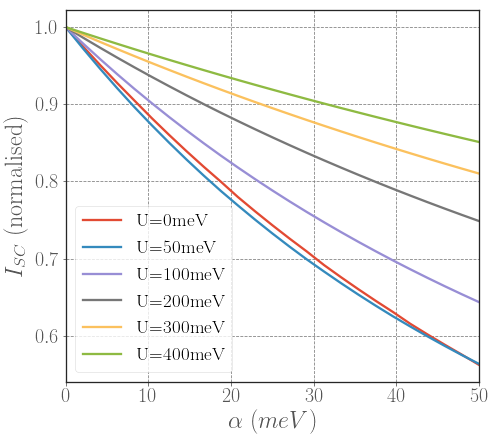

In [21]:

plt.rcParams['font.size'] = 20
plt.rcParams['legend.fontsize'] = 19
fig, ax = plt.subplots(1, 1, figsize=(7,6), sharex=True)
binding_energies = [0, 0.05, 0.1, 0.2, 0.3, 0.4] #np.linspace(0.0, 0.5, 6)
alpha_values = np.linspace(0, 50e-3, 25) #[0, 10e-3, 20e-3, 30e-3]
for U, I_SC in zip(binding_energies, data_77):
    ax.plot(alpha_values*1000, np.array(I_SC)/I_SC[0], label='U={}meV'.format(int(U*1000)))

ax.set_xlabel(r'$\alpha$ $(meV)$')
ax.set_ylabel(r'$I_{SC}$ (normalised)')
ax.set_xlim(alpha_values[0]*1000, alpha_values[-1]*1000)

#ax.yaxis.set_major_formatter(PercentFormatter())
plt.subplots_adjust(left=0.15, bottom=0.12, right=0.97, top=0.98, wspace=0.24, hspace=0.015)
ax.legend()
plt.savefig("Isc_slope_lowT.pdf")

In [ ]:

data = []
for BE in np.linspace(0.0, 0.3, 6): #[0., 0.025, 0.05, 0.075, 0.1, 0.2]:
    I_SC = []
    alpha_values = np.linspace(0,30e-3,8) #[0, 10e-3, 20e-3, 30e-3]
    N_values = [int(n) for n in np.linspace(3,13,len(alpha_values))]
    for N, alpha in zip(N_values, alpha_values):
        PARAMS = PARAMS_setup(valence_energy=100e-3, binding_energy=BE, radiative_lifetime=1, 
                              alpha_ph=alpha, mu=700e-3,
                              bias_voltage=0, N=N, silent=False, T_C=77.)
        data_dict = populations_and_current_vs_voltage(PARAMS, x_range=[0.1,0.3],num_voltages=1)
        print(data_dict['current'])
        I_SC.append(short_current_from_dict(data_dict))
    data.append(np.array(I_SC))
    plt.plot(alpha_values, np.array(I_SC)/I_SC[0], label='U={}meV'.format(int(BE*100)))
plt.legend()

In [ ]:
data = []
for BE in np.linspace(0.0, 0.3, 6): #[0., 0.025, 0.05, 0.075, 0.1, 0.2]:
    I_SC = []
    alpha_values = np.linspace(0,30e-3,8) #[0, 10e-3, 20e-3, 30e-3]
    N_values = [int(n) for n in np.linspace(3,13,len(alpha_values))]
    for N, alpha in zip(N_values, alpha_values):
        PARAMS = PARAMS_setup(valence_energy=100e-3, binding_energy=BE, radiative_lifetime=1, 
                              alpha_ph=alpha, mu=700e-3, deformation_ratio=1e-1,
                              bias_voltage=0, N=N, silent=False, T_C=77.)
        data_dict = populations_and_current_vs_voltage(PARAMS, x_range=[0.1,0.3],num_voltages=1)
        print(data_dict['current'])
        I_SC.append(short_current_from_dict(data_dict))
    data.append(np.array(I_SC))
    plt.plot(alpha_values, np.array(I_SC)/I_SC[0], label='U={}meV'.format(int(BE*100)))
plt.legend()

$\frac{2 \Gamma _{\text{downR}} \Gamma _{\text{upEM}} \Gamma _{\text{upL}} \left(\Gamma _{\text{downRU}}+\Gamma _{\text{upLU}}\right)}{\Gamma _{\text{downR}} \left(\Gamma _{\text{upL}} \left(\Gamma _{\text{downEM}}+\Gamma _{\text{upEM}}+\Gamma _{\text{upLU}}\right)+\Gamma _{\text{downRU}} \left(\Gamma _{\text{upEM}}+\Gamma _{\text{upL}}\right)\right)+\Gamma _{\text{upEM}} \Gamma _{\text{upL}} \Gamma _{\text{upLU}}}$

In [22]:
import rate_functions as rf

def analyticalCurrent(rd):
    # rd is a dict with the various rates as key-value pairs
    numer = rd['R_down']*rd['EM_up']*rd['L_up']*(rd['RU_down']+rd['LU_up'])
    
    denom = rd['R_down']*rd['L_up']*(rd['EM_down']+rd['EM_up']+rd['LU_up']) 
    denom += rd['R_down']*rd['RU_down']*(rd['EM_up']+rd['L_up']) + rd['EM_up']*rd['L_up']*rd['LU_up']
    
    return numer/denom
def convert_dicts(rates, element=0):
    return {'R_down': rates['e-0'][element], 'L_up': rates['h-0'][element], 'RU_down': rates['x-h'][element], 
          'EM_down': rates['x-0'][element], 'EM_up': rates['0-x'][element], 'LU_up': rates['x-e'][element]}

reload(rf)
def calculate_current_slope_analytic(binding_energies, alpha_lim=[0,30e-3], 
                                     num_alpha=5, lead_SD='Lorentzian', radiative_lifetime=1):
    data = []
    for BE in binding_energies:
        alpha_values, rates = rf.get_all_rates_states(init_state=0, alpha_lim=alpha_lim, num_alpha=num_alpha,
                       valence_energy=100e-3, binding_energy=BE, radiative_lifetime=radiative_lifetime,
                          mu=700e-3, bias_voltage=0, N_max=10, silent=False, T_C=77., lead_SD=lead_SD)
        rd = convert_dicts(rates)
        I = []
        for i in range(num_alpha):
            rd = convert_dicts(rates, element=i)
            I.append(analyticalCurrent(rd))
        data.append(I)
        plt.plot(alpha_values, np.array(I)/I[0])
    return np.array(data)


init state 0 complete at T=77.0K
init state 0 complete at T=77.0K


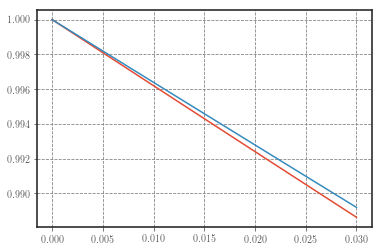

In [8]:

binding_energies = np.linspace(0.0, 0.1, 2)
alpha_values = np.linspace(0, 30e-3, 8) #[0, 10e-3, 20e-3, 30e-3]
data_an_77 = calculate_current_slope_analytic(binding_energies, 
                                              alpha_lim=[alpha_values[0],alpha_values[-1]], 
                                              num_alpha=len(alpha_values), lead_SD='flat')

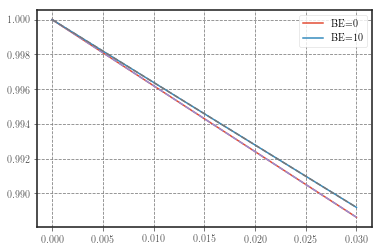

In [12]:
for BE,data in zip(binding_energies, np.array(data_77)):
    plt.plot(alpha_values, data/data[0], label='BE={}'.format(int(100*BE)))
for BE in np.array(data_an_77):
    plt.plot(alpha_values, BE/BE[0], linestyle='dashed')
plt.legend()

init state 0 complete at T=77.0K
init state 0 complete at T=77.0K
init state 0 complete at T=77.0K


init state 0 complete at T=77.0K


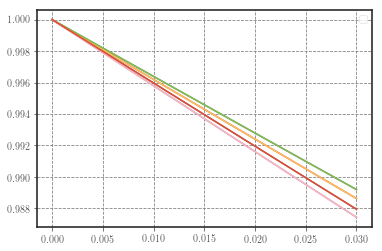

In [24]:
binding_energies = np.linspace(0.0, 0.1, 2)
alpha_values = np.linspace(0, 30e-3, 8) #[0, 10e-3, 20e-3, 30e-3]
data_an_77_1 = calculate_current_slope_analytic(binding_energies, 
                                              alpha_lim=[alpha_values[0],alpha_values[-1]], 
                                              num_alpha=len(alpha_values), lead_SD='flat', radiative_lifetime=1)
data_an_77_2 = calculate_current_slope_analytic(binding_energies, 
                                              alpha_lim=[alpha_values[0],alpha_values[-1]], 
                                              num_alpha=len(alpha_values), lead_SD='flat', radiative_lifetime=2)



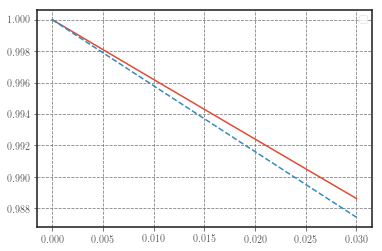

In [27]:
for BE in np.array(data_an_77_1):
    plt.plot(alpha_values, BE/BE[0])
    break
for BE in np.array(data_an_77_2):
    plt.plot(alpha_values, BE/BE[0], ls='dashed')
    break
plt.legend()

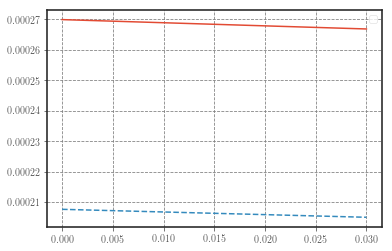

In [26]:
for BE in np.array(data_an_77_1):
    plt.plot(alpha_values, BE)
    break
for BE in np.array(data_an_77_2):
    plt.plot(alpha_values, BE, linestyle='dashed')
    break
plt.legend()

longer lifetime (slower optical decay) means less current overall and more deleterious phonon effects on current (steeper decline in current wrt $\alpha$)

In [9]:
print(data_an_77/2)

[[2.69835138e-04 2.54010503e-04 2.39104082e-04 2.25089125e-04
  2.11929593e-04 1.99587098e-04 1.88013847e-04 1.77165532e-04]
 [4.52019693e-07 4.31087162e-07 4.11639980e-07 3.93549671e-07
  3.76697932e-07 3.60980468e-07 3.46300680e-07 3.32571878e-07]]


# Percentage change of rates with increasing $\alpha$

In [14]:
def percentage_change_of_rates(PARAMS, alpha_vals = [0, 0.025], N_vals=[3,8]):
    PARAMS.update({'alpha_ph' : alpha_vals[0], 'N': N_vals[0]})
    
    dic = build_L(PARAMS, silent=True)
    rate_dic_0 = rf.get_rates_state(PARAMS, dic, init_state=0)
    
    
    PARAMS.update({'alpha_ph' : alpha_vals[1], 'N': N_vals[1]})
    dic = build_L(PARAMS, silent=True)
    rate_dic_1 = rf.get_rates_state(PARAMS, dic, init_state=0)
    
    perc_change_dict = {}
    for key, rate_0 in rate_dic_0.items():
        if rate_0!=0.0:
            perc_change_dict[key] = (rate_0-rate_dic_1[key])/rate_0
        
    for key, value in perc_change_dict.items():
        if value != 0.0:
            print(key+': '+str( value))
    return perc_change_dict

print("With no binding energy")
PARAMS = PARAMS_setup(valence_energy=100e-3, binding_energy=0., radiative_lifetime=1, alpha_ph=0, mu=700e-3,
                      bias_voltage=0, N=3,  T_C=77., delta_leads=30e-3, lead_SD='flat')
pc_0 = percentage_change_of_rates(PARAMS, alpha_vals = [0, 0.03], N_vals=[3,10])
print("")
print("With finite binding energy")

PARAMS = PARAMS_setup(valence_energy=100e-3, binding_energy=0.1, radiative_lifetime=1, alpha_ph=0, mu=700e-3,
                      bias_voltage=0, N=3, T_C=77., delta_leads=30e-3, lead_SD='flat')
pc_1 = percentage_change_of_rates(PARAMS, alpha_vals = [0, 0.03], N_vals=[3,10])
print(pc_0['x-h']/pc_1['x-h'])
"""dic = build_L(PARAMS, silent=True)
rate_dic_single = rf.get_rates_state(PARAMS, dic, init_state=0)

for key, value in rate_dic_single.items():
    if value != 0.0:
        print(key+': '+str( value))"""

With no binding energy
x-h: 1.56562959788e-12
0-x: 2.06519028595e-06
h-0: -4.6398706647e-14
e-0: 3.45605014229e-12
x-e: 1.26648864059e-12
x-0: 7.85993585626e-07

With finite binding energy
x-h: 1.56562959788e-12
0-x: 2.03583476239e-06
h-0: -4.6398706647e-14
e-0: 3.45605014229e-12
x-e: 1.26648864059e-12
x-0: 8.17442647353e-07
1.0


"dic = build_L(PARAMS, silent=True)\nrate_dic_single = rf.get_rates_state(PARAMS, dic, init_state=0)\n\nfor key, value in rate_dic_single.items():\n    if value != 0.0:\n        print(key+': '+str( value))"

In [ ]:
1.79374395205

The lead rates `x-h` and `x-e` (involving exciton dissociation) decrease more rapidly as a function of $\alpha$ the smaller the binding energy. This is probably because the spectral density is more sensitive to changes in frequency near the peak of the Lorentzian (with U>0, the spectral density is sampled further away from the peak). This doesn't take into account the changing thermal occupations. 

I could use flat leads for this (or at least a very wide Lorentzian).

In [45]:
print("With no binding energy")
PARAMS = PARAMS_setup(valence_energy=100e-3, binding_energy=0., radiative_lifetime=1, alpha_ph=0, mu=700e-3,
                      bias_voltage=0, N=3,  T_C=77., delta_leads=30e-3)
pc_0 = percentage_change_of_rates(PARAMS, alpha_vals = [0, 0.025], N_vals=[3,8])
print("")
print("With finite binding energy")

PARAMS = PARAMS_setup(valence_energy=100e-3, binding_energy=0.1, radiative_lifetime=1, alpha_ph=0, mu=700e-3,
                      bias_voltage=0, N=3, T_C=77., delta_leads=30e-3)
pc_1 = percentage_change_of_rates(PARAMS, alpha_vals = [0, 0.025], N_vals=[3,8])
print(pc_0['x-h']/pc_1['x-h'])

With no binding energy
x-h: 7.15984747068e-05
0-x: 1.7209410199e-06
h-0: 1.79002917191e-05
e-0: 7.15984740021e-05
x-e: 1.79002920362e-05
x-0: 6.54994671667e-07

With finite binding energy
x-h: 5.20254557602e-05
0-x: 1.69647796468e-06
h-0: 1.79002917191e-05
e-0: 7.15984740021e-05
x-e: 1.30105122233e-05
x-0: 6.81202225223e-07
1.37622003807


In [48]:
print("With no binding energy")
PARAMS = PARAMS_setup(valence_energy=100e-3, binding_energy=0., radiative_lifetime=1, alpha_ph=0, mu=700e-3,
                      bias_voltage=0, N=3,  T_C=77., delta_leads=45e-3)
pc_0 = percentage_change_of_rates(PARAMS, alpha_vals = [0, 0.025], N_vals=[3,8])
print("")
print("With finite binding energy")

PARAMS = PARAMS_setup(valence_energy=100e-3, binding_energy=0.1, radiative_lifetime=1, alpha_ph=0, mu=700e-3,
                      bias_voltage=0, N=3, T_C=77., delta_leads=45e-3)
pc_1 = percentage_change_of_rates(PARAMS, alpha_vals = [0, 0.025], N_vals=[3,8])
print(pc_0['x-h']/pc_1['x-h'])

With no binding energy
x-h: 5.37984234825e-05
0-x: 1.7209410199e-06
h-0: 1.34498987433e-05
e-0: 5.37984222869e-05
x-e: 1.34498991498e-05
x-0: 6.54994671667e-07

With finite binding energy
x-h: 4.96314855311e-05
0-x: 1.69647796468e-06
h-0: 1.34498987433e-05
e-0: 5.37984222869e-05
x-e: 1.24088087213e-05
x-0: 6.81202225223e-07
1.08395755047


In [76]:
50e-3

0.05

In [20]:
print("With no binding energy")
PARAMS = PARAMS_setup(valence_energy=100e-3, binding_energy=0.0, radiative_lifetime=1, alpha_ph=0, mu=700e-3,
                      bias_voltage=0, N=3,  T_C=77., delta_leads=2000e-3)
pc_0 = percentage_change_of_rates(PARAMS, alpha_vals = [0, 0.03], N_vals=[3,7])
print("")
print("With finite binding energy")

PARAMS = PARAMS_setup(valence_energy=100e-3, binding_energy=0.1, radiative_lifetime=1, alpha_ph=0, mu=700e-3,
                      bias_voltage=0, N=3, T_C=77., delta_leads=2000e-3)
pc_1 = percentage_change_of_rates(PARAMS, alpha_vals = [0, 0.03], N_vals=[3,7])
print(pc_0['x-h']/pc_1['x-h'])

With no binding energy
x-h: 7.29975592384e-08
0-x: 2.06519028595e-06
h-0: 1.82473603563e-08
e-0: 7.29994485153e-08
x-e: 1.82486716099e-08
x-0: 7.85993585626e-07

With finite binding energy
x-h: 3.63132844577e-07
0-x: 2.03583476259e-06
h-0: 1.82473603563e-08
e-0: 7.29994485153e-08
x-e: 9.07825353707e-08
x-0: 8.17442647508e-07
0.201021638027


# Puzzling phenomenon!
If the lead SD width is equal to $50meV$ then the rate of decrease of current is the same for $U=0$ and $U=100meV$. For this to occur, the
$J_{\nu}(\omega) = \frac{1}{2\pi}\frac{\Gamma\delta_{\nu}^2}{(\omega-\omega_{\nu})^2+\delta_{\nu}^2}$

$1/\sqrt{U}$

In [90]:
1/np.sqrt(0.1)

3.162277660168379

In [91]:
1/(np.sqrt(200))

0.07071067811865475

In [2]:
print("With no binding energy")
BE = 0.2
delta = 1/(2*np.sqrt(BE*1000))
PARAMS = PARAMS_setup(valence_energy=100e-3, binding_energy=0., radiative_lifetime=1, alpha_ph=0, mu=700e-3,
                      bias_voltage=0, N=3,  T_C=77., delta_leads=0.07071)
pc_0 = percentage_change_of_rates(PARAMS, alpha_vals = [0, 0.025], N_vals=[3,8])
print("")
print("With finite binding energy")

PARAMS = PARAMS_setup(valence_energy=100e-3, binding_energy=0.2, radiative_lifetime=1, alpha_ph=0, mu=700e-3,
                      bias_voltage=0, N=3, T_C=77., delta_leads=0.07071)
pc_1 = percentage_change_of_rates(PARAMS, alpha_vals = [0, 0.025], N_vals=[3,8])
print(pc_0['x-h']/pc_1['x-h'])

With no binding energy


NameError: name 'percentage_change_of_rates' is not defined

In [ ]:
0.999910190097

In [13]:
print("With no binding energy")
BE = 0.3
delta = 300.
PARAMS = PARAMS_setup(valence_energy=100e-3, binding_energy=0., radiative_lifetime=1, alpha_ph=0, mu=700e-3,
                      bias_voltage=0, N=3,  T_C=77., delta_leads=delta)
pc_0 = percentage_change_of_rates(PARAMS, alpha_vals = [0, 0.025], N_vals=[3,8])
print("")
print("With finite binding energy")

PARAMS = PARAMS_setup(valence_energy=100e-3, binding_energy=0.3, radiative_lifetime=1, alpha_ph=0, mu=700e-3,
                      bias_voltage=0, N=3, T_C=77., delta_leads=delta)
pc_1 = percentage_change_of_rates(PARAMS, alpha_vals = [0, 0.025], N_vals=[3,8])
print(pc_0['x-h']/pc_1['x-h'])

With no binding energy
x-h: 3.62596089902e-12
0-x: 1.7209410199e-06
h-0: 6.64449084272e-13
e-0: 1.01358301422e-12
x-e: 1.4238194663e-12
x-0: 6.54994671667e-07

With finite binding energy
x-h: 3.60849964224e-11
0-x: 1.64388750573e-06
h-0: 6.64449084272e-13
e-0: 1.01358301422e-12
x-e: 9.53886477227e-12
x-0: 7.37273597244e-07
0.100483892435


In [ ]:
1.01716354679